In [1]:
import time
import datetime
import pandas as pd
import yfinance as yf
from yahoo_fin.stock_info import get_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# user_DJI_weight = int(input("Enter your Commodity weight of portfolio  as %:"))
# user_GOLD_weight = int(input("Enter your Gold weight of portfolio as %:"))
# user_IYR_weight = int(input("Enter your Real Estate weight of portfolio as %:"))
# user_SPY_weight = int(input("Enter your Equity weight of portfolio as %:"))
# user_VNMFX_weight = int(input("Enter your Fixed Income weight of portfolio as %:"))
# print(f"User's Protfolio weight defined as,\nDJI(Commodity): %{user_DJI_weight}\nGOLD: %{user_GOLD_weight}\nIYR(Real Estate): %{user_IYR_weight}\nSPY(Equity): %{user_SPY_weight}\nVNMFX(Fixed Income): %{user_VNMFX_weight}")

In [3]:
# user_port_weight= [user_DJI_weight/100, user_GOLD_weight/100, user_IYR_weight/100,user_SPY_weight/100, user_VNMFX_weight/100]
# print(user_port_weight)
user_port_weight = (0.2,0.2,0.2,0.2,0.2)

EVENT 2001

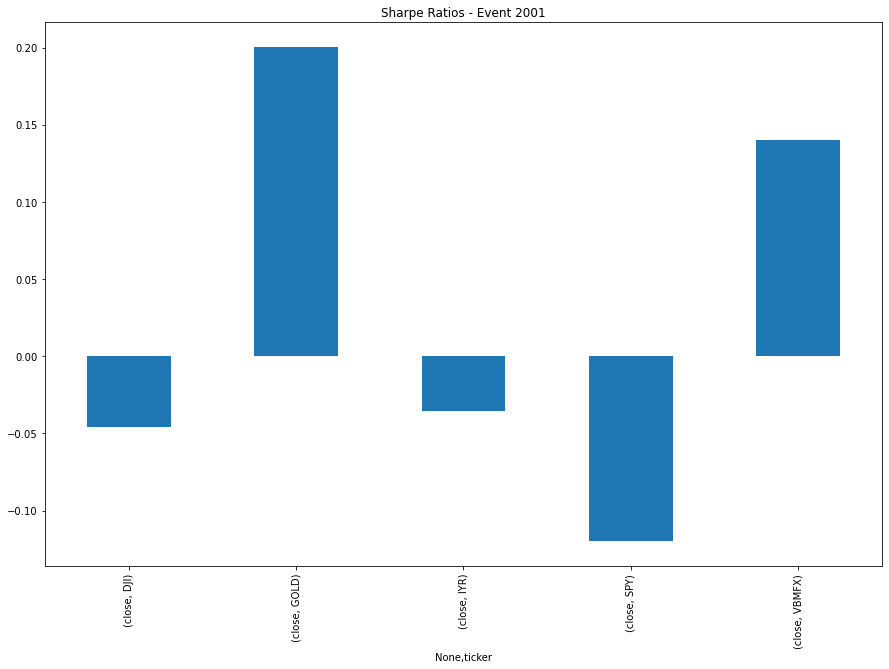

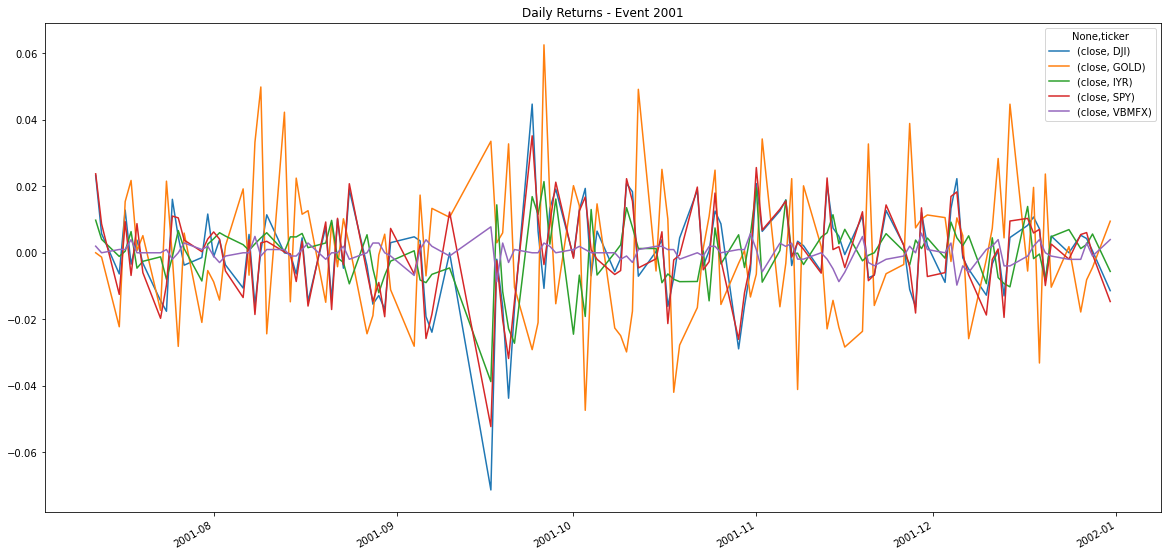

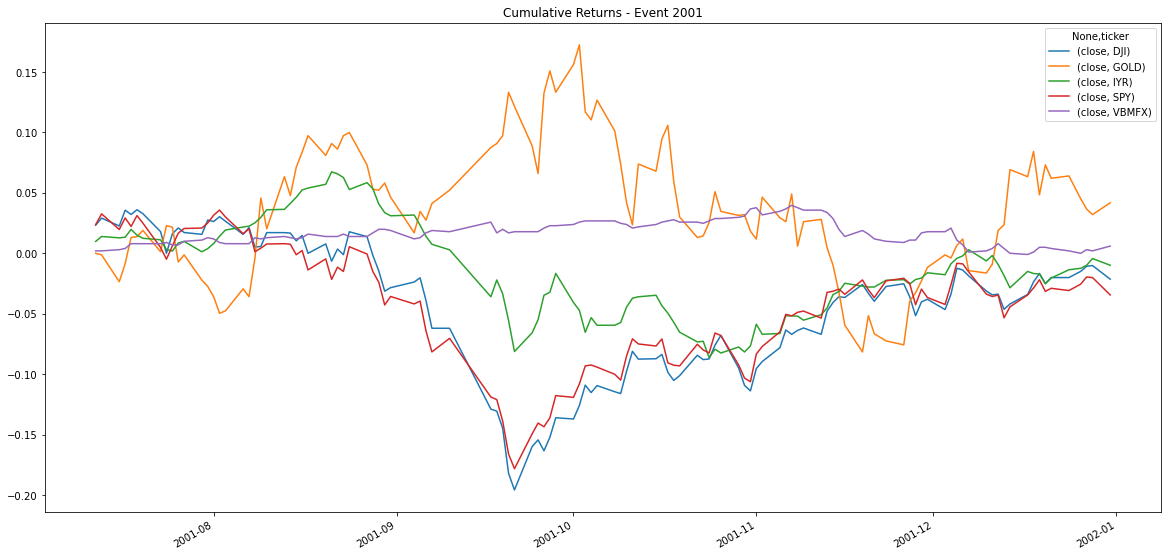

In [4]:
Commodity_2001 = get_data("DJI", start_date="7/11/2001", end_date="01/1/2002", index_as_date = True, interval="1d")
GOLD_2001 = get_data("GOLD", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
RE_2001 = get_data("IYR", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
Equity_2001 = get_data("SPY", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
fixed_income_2001 = get_data("VBMFX", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")

frames_2001 = [Commodity_2001,GOLD_2001,RE_2001,Equity_2001,fixed_income_2001]
event_2001 = pd.concat(frames_2001).drop(columns = ['open','high','low','adjclose','volume'])
event_2001 = event_2001.pivot(columns='ticker')
#stats
event_2001.describe
# Calculate daily returns using the combined portfolio
daily_returns_event_2001 = event_2001.pct_change().dropna()
# To calculate the annualized average return of event_2001,
trading_days_event_2001 = 117
average_annual_return__event_2001 = daily_returns_event_2001.mean() * trading_days_event_2001
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2001 = daily_returns_event_2001.std() * np.sqrt(252)
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2001 = average_annual_return__event_2001 / annual_std_dev_event_2001
# Plotting the sharp ratios for securities
sharpe_ratios_event_2001.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2001")
# Plotting the daily returns for securities
daily_returns_event_2001.plot(figsize=(20, 10), title="Daily Returns - Event 2001")
plt.savefig('sample.png')
cumulative_returns_event_2001 = (1 + daily_returns_event_2001).cumprod() - 1
cumulative_returns_event_2001.plot(figsize=(20, 10),title= "Cumulative Returns - Event 2001")
#calcuate portfolio return on user allocation
weighted_portfolio_return_event_2001 = cumulative_returns_event_2001* user_port_weight


In [5]:
# Initialize an empty list for storing the portfolio returns
Optimal_returns_2001 = []
# Initialize an empty list for storing the portfolio volatility
Optimal_volatility_2001 = []
# Initialize an empty list for storing the portfolio weights
Optimal_weights_2001 = []
num_assets_2001 = len (event_2001.columns)
num_portfolios_2001 = 1000
# Computing the individual asset return
individual_rets_2001 = daily_returns_event_2001
variance_matrix_2001 = daily_returns_event_2001.cov()*252


for port_2001 in range (num_portfolios_2001):
# Randomly generate weigh combination
    weights_2001 = np.random.random(num_assets_2001)
# Normalize weight so that they sum to
    weights_2001 = weights_2001/np.sum(weights_2001)
    Optimal_weights_2001.append(weights_2001)
# Returns are the dot product of individual expected returns of asset and its weights
    returns_2001 = np.dot(weights_2001, average_annual_return__event_2001)
    Optimal_returns_2001.append(returns_2001)
# Computing Portfolio Variance
    var_2001 = variance_matrix_2001.mul(weights_2001, axis=0).mul(weights_2001, axis=1).sum().sum()
# Daily standard deviation : volatility is square root of variance
    sd_2001 = np.sqrt(var_2001)
#Annualizing the standard deviation will qive us the volatility
    ann_sd_2001 = sd_2001*np.sqrt(250)
    Optimal_volatility_2001.append(ann_sd_2001)

df_weight_2001 = pd.DataFrame(Optimal_weights_2001)
df_weight_2001.columns = ['DJI','GOLD','IYR','SPY','VBMFX']
dic_2001 = {'Returns':Optimal_returns_2001, 'Volatility':Optimal_volatility_2001}
df_dic_2001 = pd.DataFrame(dic_2001)
portfolios_2001 = pd.concat([df_weight_2001, df_dic_2001], axis=1, join='inner')

rf = 0.0516
optimal_risky_port_2001 = portfolios_2001.iloc[ ((portfolios_2001['Returns']-rf)/portfolios_2001['Volatility']).idxmax()]
optimal_risky_port_2001

DJI           0.004367
GOLD          0.716959
IYR           0.022705
SPY           0.132475
VBMFX         0.123494
Returns       0.045212
Volatility    3.699702
Name: 698, dtype: float64

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

EVENT 2003

<AxesSubplot:title={'center':'Cumulative Returns - Event 2003'}>

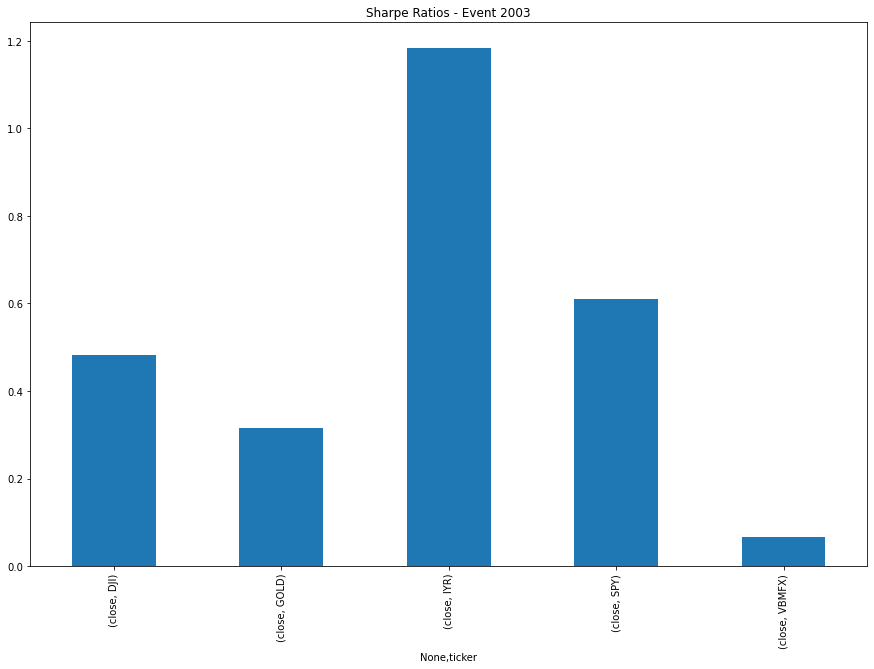

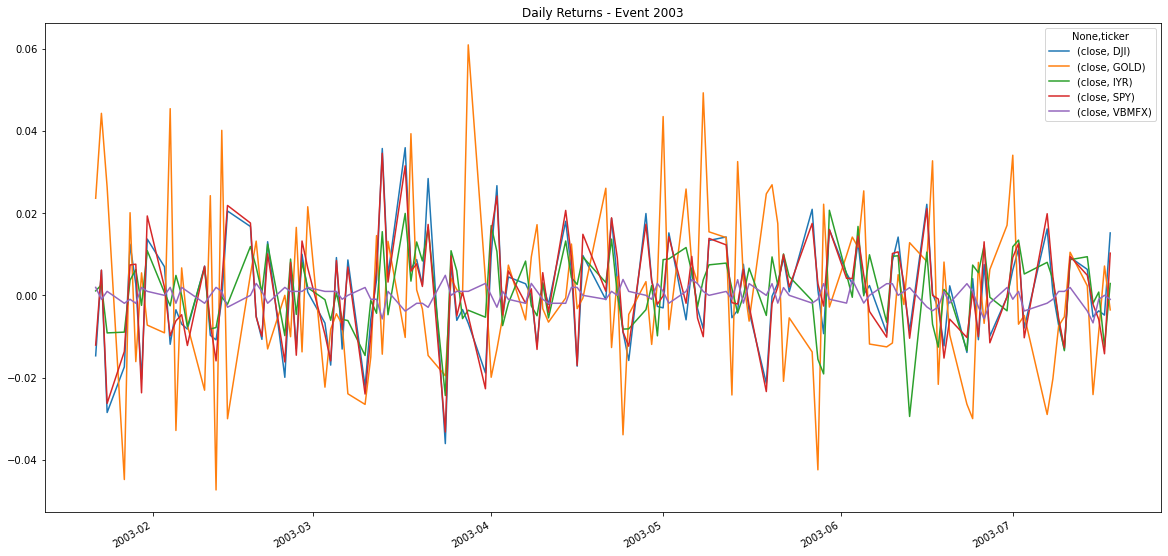

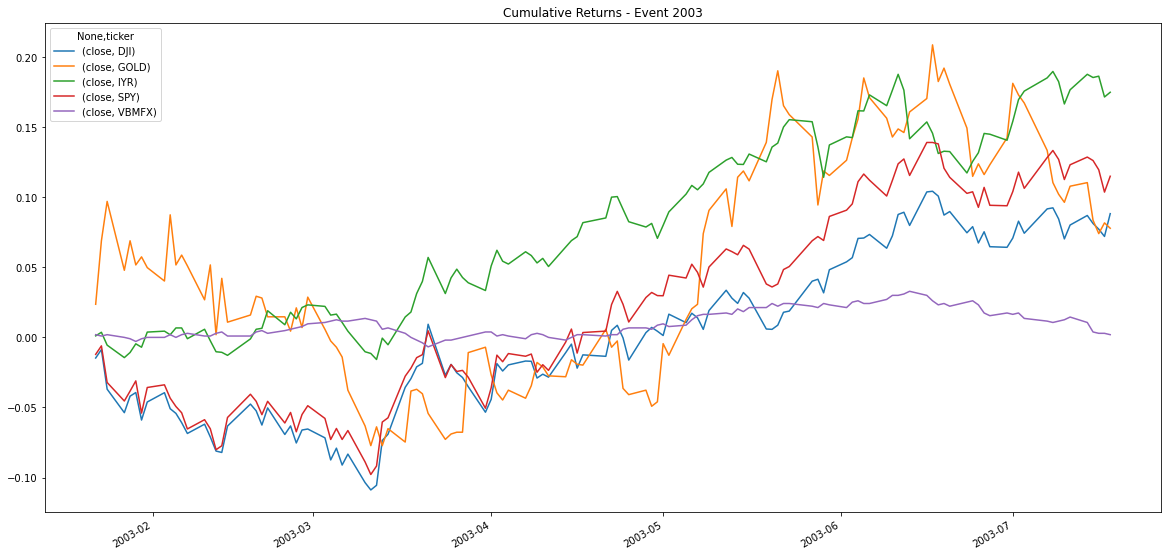

In [6]:
Commodity_2003 = get_data("DJI", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")
GOLD_2003 = get_data("GOLD", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")
RE_2003 = get_data("IYR", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")
Equity_2003 = get_data("SPY", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")
fixed_income_2003 = get_data("VBMFX", start_date="1/20/2003", end_date="07/20/2003", index_as_date = True, interval="1d")

frames_2003 = [Commodity_2003,GOLD_2003,RE_2003,Equity_2003,fixed_income_2003]
event_2003 = pd.concat(frames_2003).drop(columns = ['open','high','low','adjclose','volume'])

event_2003 = event_2003.pivot(columns='ticker')
#Stats 2003
event_2003.describe

# Calculate daily returns using the combined portfolio
daily_returns_event_2003 = event_2003.pct_change().dropna()
# To calculate the annualized average return of event_2001,
trading_days_event_2003 = 125
average_annual_return__event_2003 = daily_returns_event_2003.mean() * trading_days_event_2003
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2003 = daily_returns_event_2003.std() * np.sqrt(252)
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2003 = average_annual_return__event_2003 / annual_std_dev_event_2003
# Plotting the sharp ratios for securities
sharpe_ratios_event_2003.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2003")
# Plotting the daily returns for securities
daily_returns_event_2003.plot(figsize=(20, 10), title="Daily Returns - Event 2003")
cumulative_returns_event_2003 = (1 + daily_returns_event_2003).cumprod() - 1
cumulative_returns_event_2003.plot(figsize=(20, 10),title= "Cumulative Returns - Event 2003")
weighted_portfolio_return_event_2003 = cumulative_returns_event_2003* user_port_weight

In [7]:
# Initialize an empty list for storing the portfolio returns
Optimal_returns_2003 = []
# Initialize an empty list for storing the portfolio volatility
Optimal_volatility_2003 = []
# Initialize an empty list for storing the portfolio weights
Optimal_weights_2003 = []
num_assets_2003 = len (event_2003.columns)
num_portfolios_2003 = 1000
# Computing the individual asset return
individual_rets_2003 = daily_returns_event_2003
variance_matrix_2003 = daily_returns_event_2003.cov()*252


for port_2003 in range (num_portfolios_2003):
# Randomly generate weigh combination
    weights_2003 = np.random.random(num_assets_2003)
# Normalize weight so that they sum to
    weights_2003 = weights_2003/np.sum(weights_2003)
    Optimal_weights_2003.append(weights_2003)
# Returns are the dot product of individual expected returns of asset and its weights
    returns_2003 = np.dot(weights_2003, average_annual_return__event_2003)
    Optimal_returns_2003.append(returns_2003)
# Computing Portfolio Variance
    var_2003 = variance_matrix_2003.mul(weights_2003, axis=0).mul(weights_2003, axis=1).sum().sum()
# Daily standard deviation : volatility is square root of variance
    sd_2003 = np.sqrt(var_2003)
#Annualizing the standard deviation will qive us the volatility
    ann_sd_2003 = sd_2003*np.sqrt(250)
    Optimal_volatility_2003.append(ann_sd_2003)

df_weight_2003 = pd.DataFrame(Optimal_weights_2003)
df_weight_2003.columns = ['DJI','GOLD','IYR','SPY','VBMFX']
dic_2003 = {'Returns':Optimal_returns_2003, 'Volatility':Optimal_volatility_2003}
df_dic_2003 = pd.DataFrame(dic_2003)
portfolios_2003 = pd.concat([df_weight_2003, df_dic_2003], axis=1, join='inner')

rf = 0.0401
optimal_risky_port_2003 = portfolios_2003.iloc[ ((portfolios_2003['Returns']-rf)/portfolios_2003['Volatility']).idxmax()]
optimal_risky_port_2003

DJI           0.124914
GOLD          0.059606
IYR           0.677702
SPY           0.097224
VBMFX         0.040554
Returns       0.143018
Volatility    2.054535
Name: 197, dtype: float64

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

EVENT 2008


<AxesSubplot:title={'center':'Cumulative Returns - Event 2008'}>

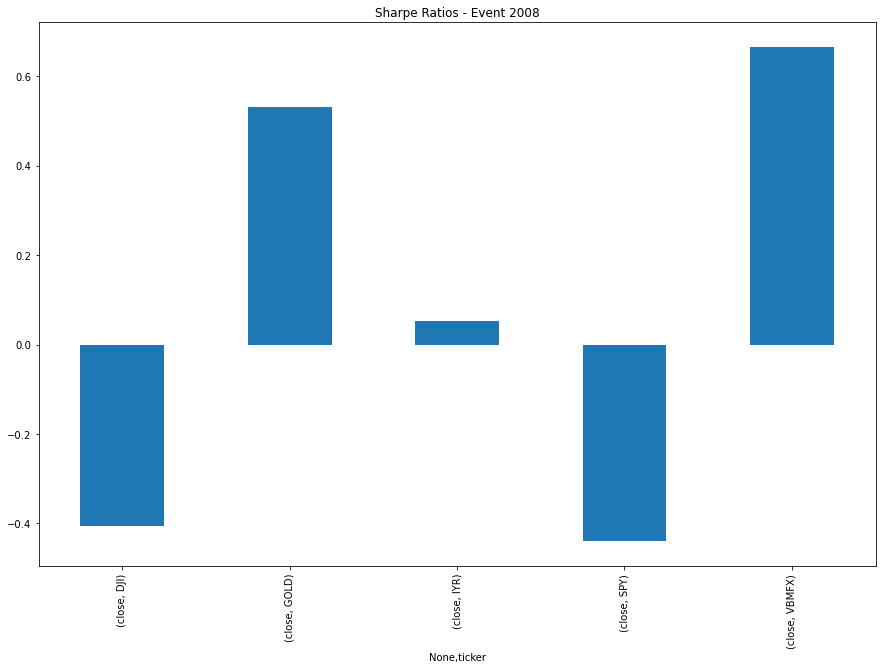

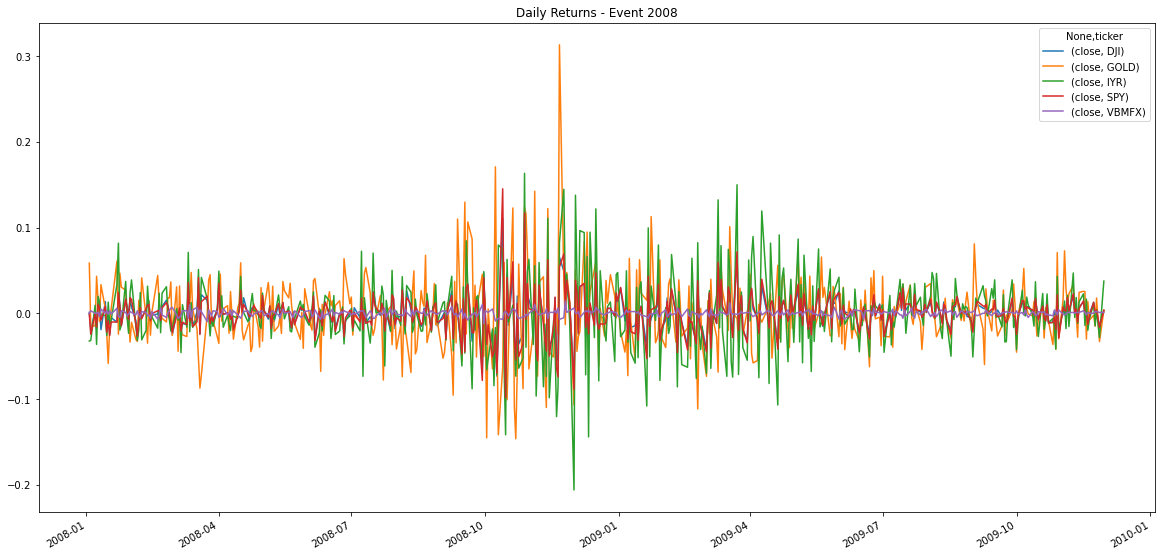

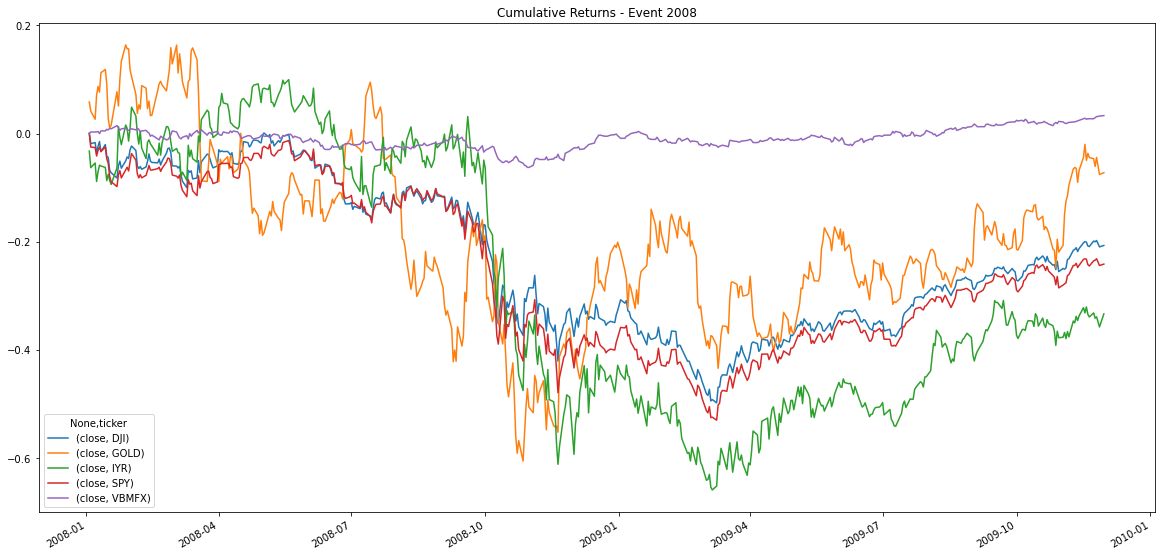

In [8]:
Commodity_2008 = get_data("DJI", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")
GOLD_2008 = get_data("GOLD", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")
RE_2008 = get_data("IYR", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")
Equity_2008 = get_data("SPY", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")
fixed_income_2008 = get_data("VBMFX", start_date="1/1/2008", end_date="12/01/2009", index_as_date = True, interval="1d")

frames_2008 = [Commodity_2008,GOLD_2008,RE_2008,Equity_2008,fixed_income_2008]
event_2008 = pd.concat(frames_2008).drop(columns = ['open','high','low','adjclose','volume'])

event_2008 = event_2008.pivot(columns='ticker')
# Stats 2008
event_2008.describe
# Calculate daily returns using the combined portfolio
daily_returns_event_2008 = event_2008.pct_change().dropna()
# To calculate the annualized average return of event_2001,
trading_days_event_2008 = 483
average_annual_return__event_2008 = daily_returns_event_2008.mean() * trading_days_event_2008
daily_std_dev_event_2008 = daily_returns_event_2008.std()
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2008 = daily_returns_event_2008.std() * np.sqrt(252)
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2008 = average_annual_return__event_2008 / annual_std_dev_event_2008
# Plotting the sharp ratios for securities
sharpe_ratios_event_2008.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2008")
# Plotting the daily returns for securities
daily_returns_event_2008.plot(figsize=(20, 10), title="Daily Returns - Event 2008")
#Cumulative returns
cumulative_returns_event_2008 = (1 + daily_returns_event_2008).cumprod() - 1
cumulative_returns_event_2008.plot(figsize=(20, 10),title= "Cumulative Returns - Event 2008")
weighted_portfolio_return_event_2008 = cumulative_returns_event_2008* user_port_weight

In [9]:
# Initialize an empty list for storing the portfolio returns
Optimal_returns_2008 = []
# Initialize an empty list for storing the portfolio volatility
Optimal_volatility_2008 = []
# Initialize an empty list for storing the portfolio weights
Optimal_weights_2008 = []
num_assets_2008 = len (event_2008.columns)
num_portfolios_2008 = 1000
# Computing the individual asset return
individual_rets_2008 = daily_returns_event_2008
variance_matrix_2008 = daily_returns_event_2008.cov()*252


for port_2008 in range (num_portfolios_2008):
# Randomly generate weigh combination
    weights_2008 = np.random.random(num_assets_2008)
# Normalize weight so that they sum to
    weights_2008 = weights_2008/np.sum(weights_2008)
    Optimal_weights_2008.append(weights_2008)
# Returns are the dot product of individual expected returns of asset and its weights
    returns_2008 = np.dot(weights_2008, average_annual_return__event_2008)
    Optimal_returns_2008.append(returns_2008)
# Computing Portfolio Variance
    var_2008 = variance_matrix_2008.mul(weights_2008, axis=0).mul(weights_2008, axis=1).sum().sum()
# Daily standard deviation : volatility is square root of variance
    sd_2008 = np.sqrt(var_2008)
#Annualizing the standard deviation will qive us the volatility
    ann_sd_2008 = sd_2008*np.sqrt(250)
    Optimal_volatility_2008.append(ann_sd_2008)

df_weight_2008 = pd.DataFrame(Optimal_weights_2008)
df_weight_2008.columns = ['DJI','GOLD','IYR','SPY','VBMFX']
dic_2008 = {'Returns':Optimal_returns_2008, 'Volatility':Optimal_volatility_2008}
df_dic_2008 = pd.DataFrame(dic_2008)
portfolios_2008 = pd.concat([df_weight_2008, df_dic_2008], axis=1, join='inner')

rf = 0.0428
optimal_risky_port_2008 = portfolios_2008.iloc[ ((portfolios_2008['Returns']-rf)/portfolios_2008['Volatility']).idxmax()]
optimal_risky_port_2008

DJI           0.021157
GOLD          0.349912
IYR           0.119755
SPY           0.000140
VBMFX         0.509036
Returns       0.146961
Volatility    4.216670
Name: 381, dtype: float64

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

EVENT 20020

<AxesSubplot:title={'center':'Cumulative Returns - Event 2020'}>

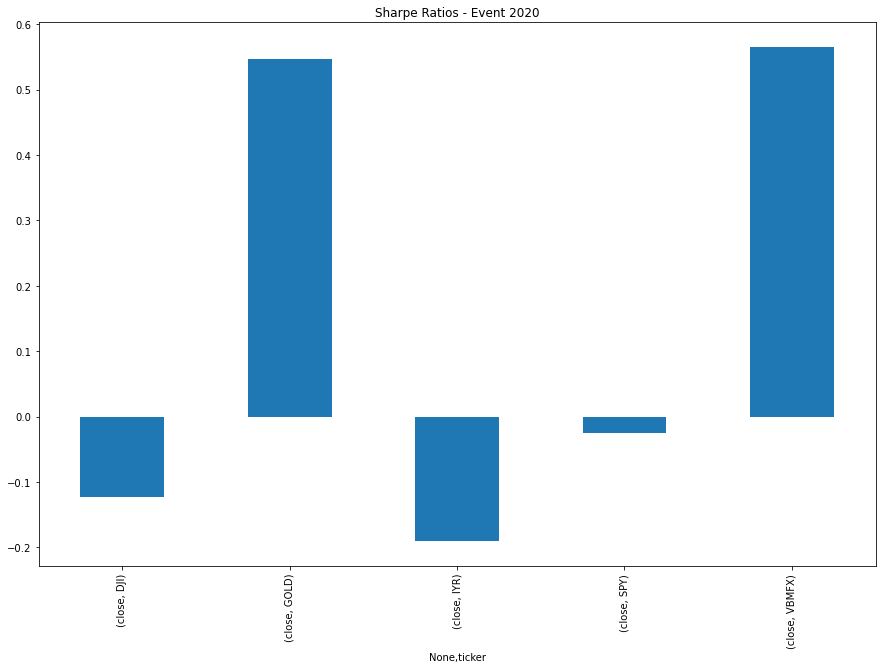

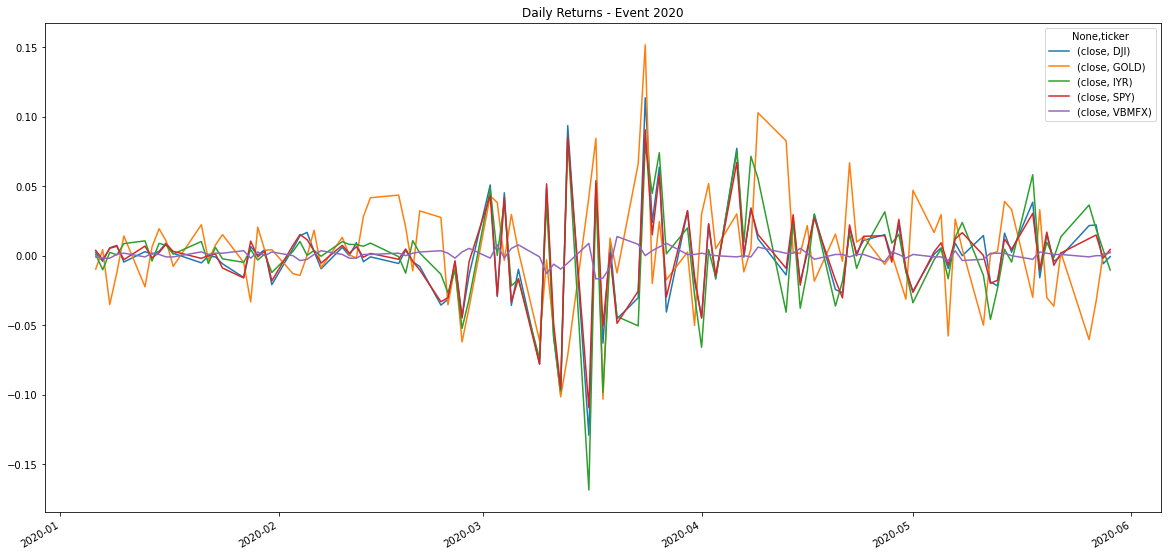

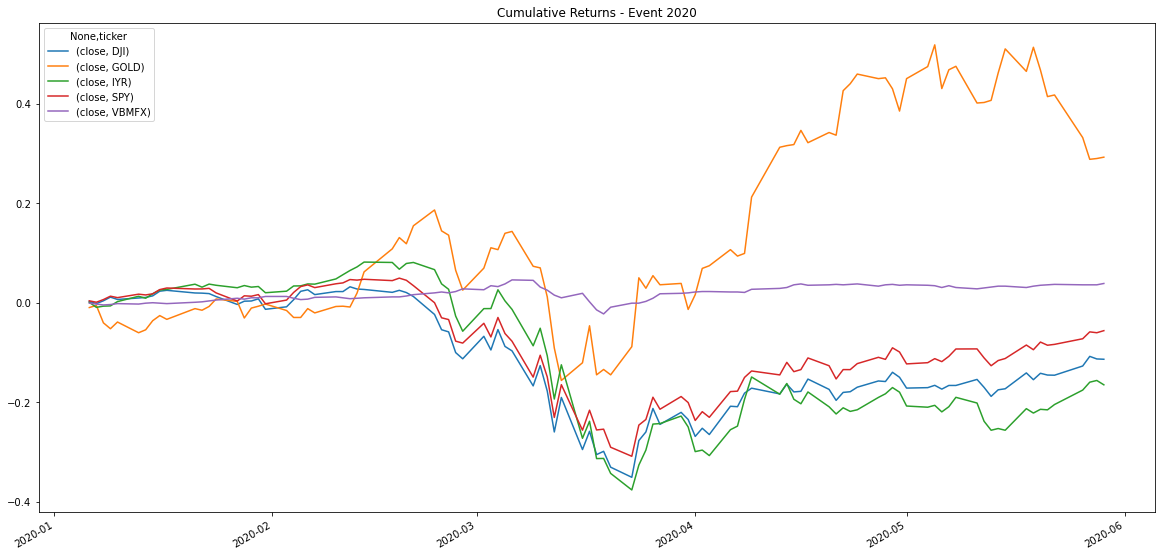

In [10]:
Commodity_2020 = get_data("DJI", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")
GOLD_2020 = get_data("GOLD", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")
RE_2020 = get_data("IYR", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")
Equity_2020 = get_data("SPY", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")
fixed_income_2020 = get_data("VBMFX", start_date="1/1/2020", end_date="6/1/2020", index_as_date = True, interval="1d")

frames_2020 = [Commodity_2020,GOLD_2020,RE_2020,Equity_2020,fixed_income_2020]
event_2020 = pd.concat(frames_2020).drop(columns = ['open','high','low','adjclose','volume'])

event_2020 = event_2020.pivot(columns='ticker')
#Stats 2020
event_2020.describe
# Calculate daily returns using the combined portfolio
daily_returns_event_2020 = event_2020.pct_change().dropna()
# To calculate the annualized average return of event_2001,
trading_days_event_2020 = 102
average_annual_return__event_2020 = daily_returns_event_2020.mean() * trading_days_event_2020
daily_std_dev_event_2020 = daily_returns_event_2020.std()
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2020 = daily_returns_event_2020.std() * np.sqrt(252)
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2020 = average_annual_return__event_2020 / annual_std_dev_event_2020
# Plotting the sharp ratios for securities
sharpe_ratios_event_2020.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2020")
# Plotting the daily returns for securities
daily_returns_event_2020.plot(figsize=(20, 10), title="Daily Returns - Event 2020")
#Cumulative returns
cumulative_returns_event_2020 = (1 + daily_returns_event_2020).cumprod() - 1
cumulative_returns_event_2020.plot(figsize=(20, 10),title= "Cumulative Returns - Event 2020")
weighted_portfolio_return_event_2020 = cumulative_returns_event_2020* user_port_weight

In [11]:
# Initialize an empty list for storing the portfolio returns
Optimal_returns_2020 = []
# Initialize an empty list for storing the portfolio volatility
Optimal_volatility_2020 = []
# Initialize an empty list for storing the portfolio weights
Optimal_weights_2020 = []
num_assets_2020 = len (event_2020.columns)
num_portfolios_2020 = 1000
# Computing the individual asset return
individual_rets_2020 = daily_returns_event_2020
variance_matrix_2020 = daily_returns_event_2020.cov()*252


for port_2020 in range (num_portfolios_2020):
# Randomly generate weigh combination
    weights_2020 = np.random.random(num_assets_2020)
# Normalize weight so that they sum to
    weights_2020 = weights_2008/np.sum(weights_2020)
    Optimal_weights_2020.append(weights_2020)
# Returns are the dot product of individual expected returns of asset and its weights
    returns_2020 = np.dot(weights_2020, average_annual_return__event_2020)
    Optimal_returns_2020.append(returns_2020)
# Computing Portfolio Variance
    var_2020 = variance_matrix_2020.mul(weights_2020, axis=0).mul(weights_2020, axis=1).sum().sum()
# Daily standard deviation : volatility is square root of variance
    sd_2020 = np.sqrt(var_2020)
#Annualizing the standard deviation will qive us the volatility
    ann_sd_2020 = sd_2020*np.sqrt(250)
    Optimal_volatility_2020.append(ann_sd_2020)

df_weight_2020 = pd.DataFrame(Optimal_weights_2020)
df_weight_2020.columns = ['DJI','GOLD','IYR','SPY','VBMFX']
dic_2020 = {'Returns':Optimal_returns_2020, 'Volatility':Optimal_volatility_2020}
df_dic_2020 = pd.DataFrame(dic_2020)
portfolios_2020 = pd.concat([df_weight_2020, df_dic_2020], axis=1, join='inner')

rf = 0.00628
optimal_risky_port_2020 = portfolios_2020.iloc[ ((portfolios_2020['Returns']-rf)/portfolios_2020['Volatility']).idxmax()]
optimal_risky_port_2020

DJI            0.347130
GOLD           0.018623
IYR            0.537056
SPY            0.359587
VBMFX          0.241690
Returns       -0.071078
Volatility    10.360147
Name: 863, dtype: float64

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

EVENT 2022

<AxesSubplot:title={'center':'Cumulative Returns - Event 2022'}>

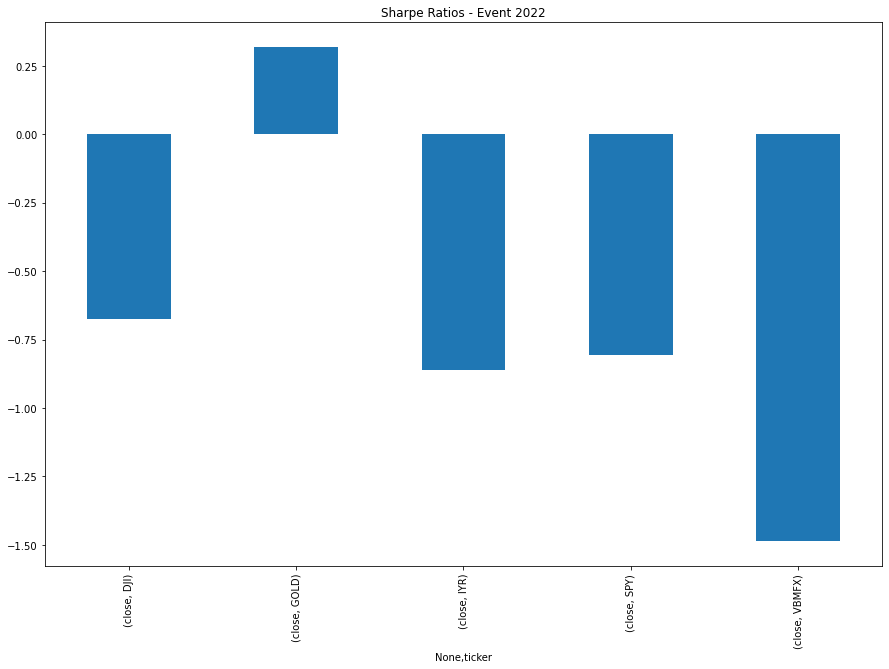

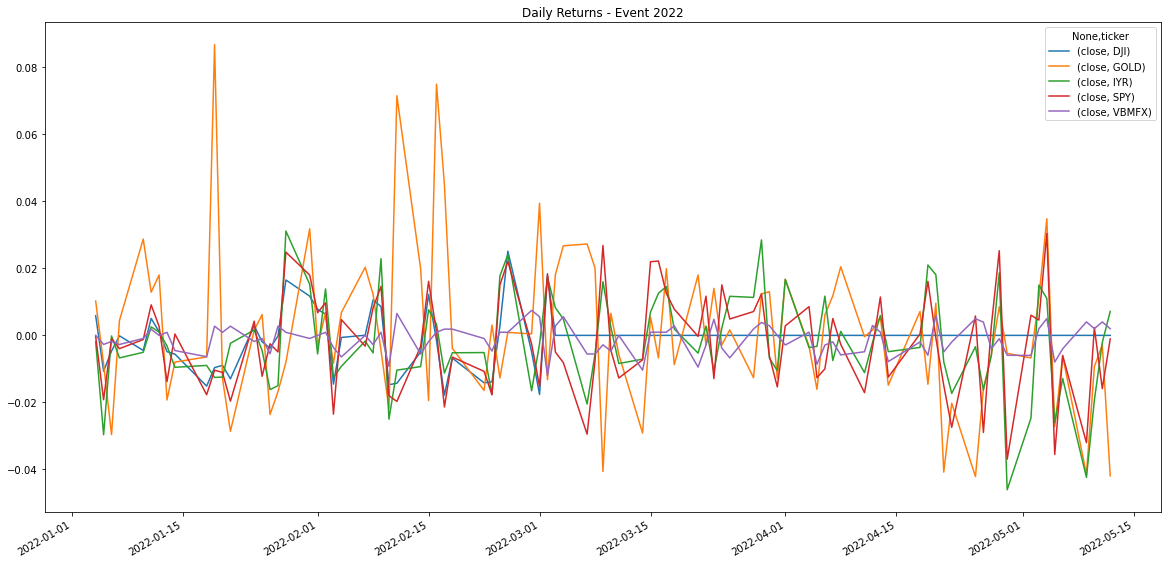

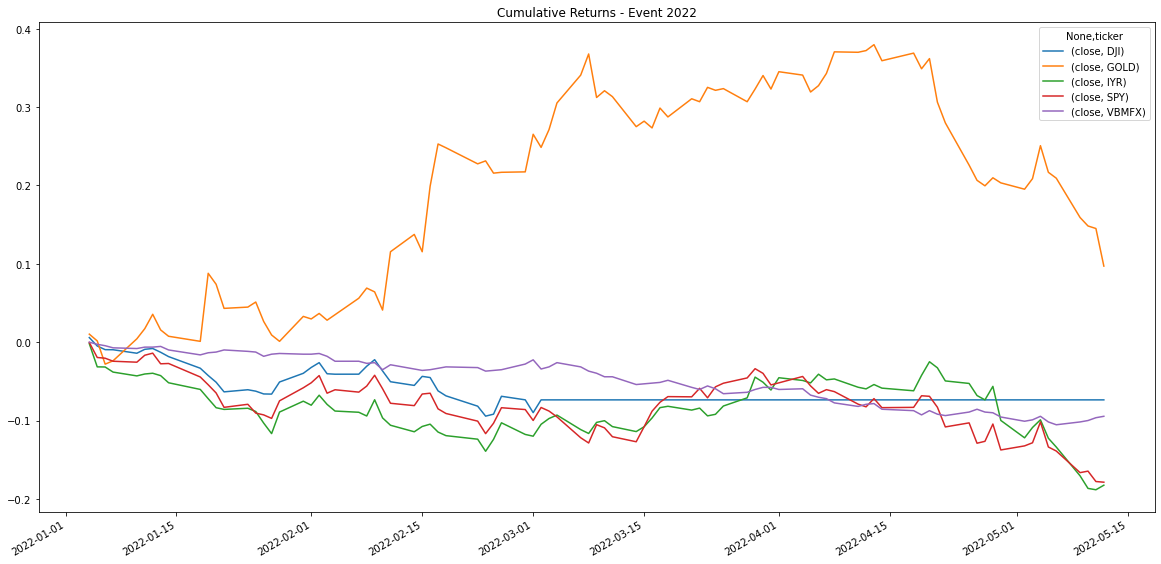

In [12]:
Commodity_2022 = get_data("DJI", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")
GOLD_2022 = get_data("GOLD", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")
RE_2022 = get_data("IYR", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")
Equity_2022 = get_data("SPY", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")
fixed_income_2022 = get_data("VBMFX", start_date="1/1/2022", end_date="5/13/2022", index_as_date = True, interval="1d")

frames_2022 = [Commodity_2022,GOLD_2022,RE_2022,Equity_2022,fixed_income_2022]
event_2022 = pd.concat(frames_2022).drop(columns = ['open','high','low','adjclose','volume'])

event_2022 = event_2022.pivot(columns='ticker')
#Stats 2022
event_2022.describe
# Calculate daily returns using the combined portfolio
daily_returns_event_2022 = event_2022.pct_change().dropna()
# To calculate the annualized average return of event_2001,
trading_days_event_2022 = 91
average_annual_return__event_2022 = daily_returns_event_2022.mean() * trading_days_event_2022
daily_std_dev_event_2022 = daily_returns_event_2022.std()
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2022 = daily_returns_event_2022.std() * np.sqrt(252)
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2022 = average_annual_return__event_2022 / annual_std_dev_event_2022
# Plotting the sharp ratios for securities
sharpe_ratios_event_2022.plot.bar(figsize=(15, 10), title="Sharpe Ratios - Event 2022")
# Plotting the daily returns for securities
daily_returns_event_2022.plot(figsize=(20, 10), title="Daily Returns - Event 2022")
cumulative_returns_event_2022 = (1 + daily_returns_event_2022).cumprod() - 1
cumulative_returns_event_2022.plot(figsize=(20, 10),title= "Cumulative Returns - Event 2022")
weighted_portfolio_return_event_2022 = cumulative_returns_event_2022* user_port_weight

In [13]:
# Initialize an empty list for storing the portfolio returns
Optimal_returns_2022 = []
# Initialize an empty list for storing the portfolio volatility
Optimal_volatility_2022 = []
# Initialize an empty list for storing the portfolio weights
Optimal_weights_2022 = []
num_assets_2022 = len (event_2022.columns)
num_portfolios_2022 = 1000
# Computing the individual asset return
individual_rets_2022 = daily_returns_event_2022
variance_matrix_2022 = daily_returns_event_2022.cov()*252


for port_2022 in range (num_portfolios_2022):
# Randomly generate weigh combination
    weights_2022 = np.random.random(num_assets_2022)
# Normalize weight so that they sum to
    weights_2022 = weights_2022/np.sum(weights_2022)
    Optimal_weights_2022.append(weights_2022)
# Returns are the dot product of individual expected returns of asset and its weights
    returns_2022 = np.dot(weights_2022, average_annual_return__event_2022)
    Optimal_returns_2022.append(returns_2022)
# Computing Portfolio Variance
    var_2022 = variance_matrix_2022.mul(weights_2022, axis=0).mul(weights_2022, axis=1).sum().sum()
# Daily standard deviation : volatility is square root of variance
    sd_2022 = np.sqrt(var_2022)
#Annualizing the standard deviation will qive us the volatility
    ann_sd_2022 = sd_2022*np.sqrt(250)
    Optimal_volatility_2022.append(ann_sd_2022)

df_weight_2022 = pd.DataFrame(Optimal_weights_2022)
df_weight_2022.columns = ['DJI','GOLD','IYR','SPY','VBMFX']
dic_2022 = {'Returns':Optimal_returns_2022, 'Volatility':Optimal_volatility_2022}
df_dic_2022 = pd.DataFrame(dic_2022)
portfolios_2022 = pd.concat([df_weight_2022, df_dic_2022], axis=1, join='inner')

rf = 0.0214
optimal_risky_port_2022 = portfolios_2022.iloc[ ((portfolios_2022['Returns']-rf)/portfolios_2022['Volatility']).idxmax()]
optimal_risky_port_2022

DJI           0.055632
GOLD          0.647070
IYR           0.044860
SPY           0.087297
VBMFX         0.165141
Returns       0.030384
Volatility    3.894162
Name: 31, dtype: float64